In [1]:
import os
import pandas as pd
import re
import matplotlib.pyplot as plt

# Function to progressively combine and process CSV files
def combine_csv_progressively(folder_path):
    pattern = re.compile(r'_([0-9]+)_\d+\.csv$')
    dfs_dict = {}
    k_values = set()

    for filename in os.listdir(folder_path):
        match = pattern.search(filename)
        if match:
            k = int(match.group(1))
            k_values.add(k)
            file_path = os.path.join(folder_path, filename)
            df = pd.read_csv(file_path)
            dfs_dict.setdefault(k, []).append(df)

    sorted_k_values = sorted(list(k_values))

    # Mapping original k-values to new indices starting from 0
    k_mapping = {k: index for index, k in enumerate(sorted_k_values)}

    size_before_dedup = []
    size_after_dedup = []

    combined_dfs = []
    for k in sorted_k_values:
        if k in dfs_dict:
            combined_dfs.extend(dfs_dict[k])
        progressive_df = pd.concat(combined_dfs, ignore_index=True)
        size_before_dedup.append(len(progressive_df))
        progressive_df.drop_duplicates(inplace=True)
        size_after_dedup.append(len(progressive_df))

    # Remap k-values to new indices
    remapped_k_values = [k_mapping[k] for k in sorted_k_values]

    return remapped_k_values, size_before_dedup, size_after_dedup

# Define the paths to the two folders
folder_path_1 = './Progression/'
#folder_path_2 = './awensgaoriginal/'

# Get data for both folders
k_values_1, size_before_dedup_1, size_after_dedup_1 = combine_csv_progressively(folder_path_1)
#k_values_2, size_before_dedup_2, size_after_dedup_2 = combine_csv_progressively(folder_path_2)

plt.figure(figsize=(10, 6))

# Plot for first folder
plt.plot(k_values_1, size_before_dedup_1, label='CMA-ES - Before Removing Duplicates', marker='o', color='blue')
plt.plot(k_values_1, size_after_dedup_1, label='CMA-ES - After Removing Duplicates', marker='x', color='blue')

# Plot for second folder
#plt.plot(k_values_2, size_before_dedup_2, label='NSGA2 - Before Removing Duplicates', marker='o', color='green')
#plt.plot(k_values_2, size_after_dedup_2, label='NSGA2 - After Removing Duplicates', marker='x', color='green')

# Adjusting x-axis limit
plt.xlim(0, 30)
plt.ylim(0, 10000)
# Set the x-ticks and y-ticks
#max_k_index = max(max(k_values_1), max(k_values_2))

plt.xticks(range(0, 100,5))
plt.yticks(range(0, 10000, 2000))

# Adding labels and title
plt.xlabel('Generation Step')
plt.ylabel('Number of Molecules')
plt.title('Explorativeness Variation in Algorithms Initiating from a Reference Molecule')
plt.legend(loc='upper left')
plt.grid(True)
plt.show()


FileNotFoundError: [Errno 2] No such file or directory: './Progression/'

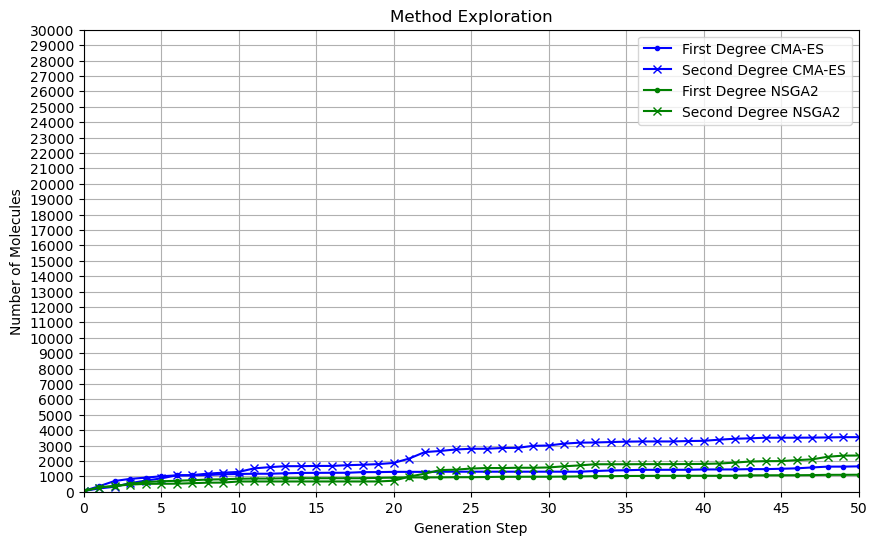

In [9]:
import os
import pandas as pd
import re
import matplotlib.pyplot as plt

# Function to progressively combine and process CSV files
def combine_csv_progressively(folder_path):
    pattern = re.compile(r'_([0-9]+)_\d+\.csv$')
    dfs_dict = {}
    k_values = set()

    for filename in os.listdir(folder_path):
        match = pattern.search(filename)
        if match:
            k = int(match.group(1))
            k_values.add(k)
            file_path = os.path.join(folder_path, filename)
            df = pd.read_csv(file_path)
            dfs_dict.setdefault(k, []).append(df)

    sorted_k_values = sorted(list(k_values))

    # Mapping original k-values to new indices starting from 0
    k_mapping = {k: index for index, k in enumerate(sorted_k_values)}

    size_before_dedup = []
    size_after_dedup = []

    combined_dfs = []
    for k in sorted_k_values:
        if k in dfs_dict:
            combined_dfs.extend(dfs_dict[k])
        progressive_df = pd.concat(combined_dfs, ignore_index=True)
        size_before_dedup.append(len(progressive_df))
        progressive_df.drop_duplicates(inplace=True)
        size_after_dedup.append(len(progressive_df))

    # Remap k-values to new indices
    remapped_k_values = [k_mapping[k] for k in sorted_k_values]

    return remapped_k_values, size_before_dedup, size_after_dedup

# Define the paths to the two folders
folder_path_1 = './resultscmaes/CCCCCCC(C)CCCCCCCCCOS(=O)(=O)O_0.9_50_10/Progression/'
folder_path_2 = './resultscmaes_around/CCCCCCC(C)CCCCCCCCCOS(=O)(=O)O_0.9_50_10/Progression/'
folder_path_3 = './resultsnsga/CCCCCCC(C)CCCCCCCCCOS(=O)(=O)O_0.9_50_10/Progression/'
folder_path_4 = './resultsnsga_around/CCCCCCC(C)CCCCCCCCCOS(=O)(=O)O_0.9_50_10/Progression/'

# Get data for both folders
k_values_1, size_before_dedup_1, size_after_dedup_1 = combine_csv_progressively(folder_path_1)
k_values_2, size_before_dedup_2, size_after_dedup_2 = combine_csv_progressively(folder_path_2)
k_values_3, size_before_dedup_3, size_after_dedup_3 = combine_csv_progressively(folder_path_3)
k_values_4, size_before_dedup_4, size_after_dedup_4 = combine_csv_progressively(folder_path_4)

plt.figure(figsize=(10, 6))

# Plot for first folder
#plt.plot(k_values_1, size_before_dedup_1, label='CMA-ES - Before Removing Duplicates', marker='o', color='blue')
plt.plot(k_values_1, size_after_dedup_1, label='First Degree CMA-ES', marker='.', color='blue')

# Plot for second folder
#plt.plot(k_values_2, size_before_dedup_2, label='NSGA2 - Before Removing Duplicates', marker='o', color='green')
plt.plot(k_values_2, size_after_dedup_2, label='Second Degree CMA-ES', marker='x', color='blue')

plt.plot(k_values_3, size_after_dedup_3, label='First Degree NSGA2', marker='.', color='green')

plt.plot(k_values_4, size_after_dedup_4, label='Second Degree NSGA2', marker='x', color='green')





# Adjusting x-axis limit
plt.xlim(0, 50)
plt.ylim(0, 30001)
# Set the x-ticks and y-ticks
max_k_index = max(max(k_values_1), max(k_values_2))

plt.xticks(range(0, 51,5))
plt.yticks(range(0, 30001, 1000))

# Adding labels and title
plt.xlabel('Generation Step')
plt.ylabel('Number of Molecules')
plt.title('Method Exploration')
plt.legend()
plt.grid(True)
plt.show()
